# **ЛАБ 4**

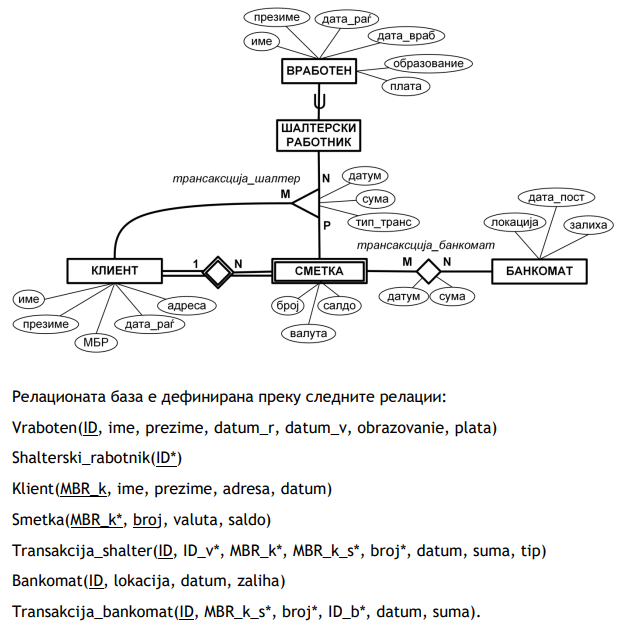

**1\. Да се најдат имињата и презимињата на сите шалтерски работници кои имаат направено трансакција за исплата на средства во износ поголем од 1000 EUR од сметка која работи со валута EUR, подредени според името на шалтерските работници.**

In [22]:
SELECT DISTINCT ime, prezime 
FROM Vraboten JOIN Shalterski_rabotnik ON Vraboten.ID = Shalterski_rabotnik.ID JOIN Transakcija_shalter ON Vraboten.ID = Transakcija_shalter.ID_v JOIN Smetka ON Transakcija_shalter.broj = Smetka.broj 
WHERE tip = 'isplata' AND valuta = 'EUR' AND suma > 1000
ORDER BY ime

(2 rows affected)

Total execution time: 00:00:00.010

ime,prezime
Blaine,Lott
Judah,Holt


**2. Да се најдат имињата и презимињата на сите клиенти кои имаат направено трансакција за исплата на средства преку банкомат во износ поголем од 400 USD од сметка која работи со валута USD, подредени според името на клиентите.**

In [23]:
SELECT DISTINCT ime, prezime 
FROM Klient JOIN Smetka ON Klient.MBR_k = Smetka.MBR_k JOIN Transakcija_bankomat ON Smetka.broj = Transakcija_bankomat.broj
WHERE valuta = 'USD' and suma > 400
ORDER BY ime

(3 rows affected)

Total execution time: 00:00:00.002

ime,prezime
Connor,Madden
Fletcher,Rivera
Jonah,Cruz


**3. Да се вратат сите сметки кои работат со валута MKD од кои е направена барем една трансакција за исплата преку шалтер и барем една трансакција за исплата преку банкомат во 2021 година, подредени според бројот на сметка**

In [26]:
SELECT Smetka.MBR_k, Smetka.broj, Smetka.valuta, Smetka.saldo
FROM Smetka JOIN Transakcija_shalter ON Smetka.broj = Transakcija_shalter.broj 
WHERE Smetka.broj IN (
    SELECT Smetka.broj
    FROM Smetka JOIN Transakcija_shalter ON Smetka.broj = Transakcija_shalter.broj
    WHERE valuta = 'MKD' AND datum LIKE '2021%' AND tip = 'isplata'
    INTERSECT
    SELECT Smetka.broj
    FROM Smetka JOIN Transakcija_bankomat ON Smetka.broj = Transakcija_bankomat.broj
    WHERE valuta = 'MKD' AND datum LIKE '2021%'
)
ORDER BY Smetka.broj

(2 rows affected)

Total execution time: 00:00:00.025

MBR_k,broj,valuta,saldo
106,80,MKD,34150.0
158,340,MKD,12150.0


**4. Да се вратат сите клиенти кои направиле барем една трансакција преку банкомат (за сметки кои работат со валута EUR), но не направиле ниту една трансакција преку шалтер од истата сметка, подредени според името на клиентот.**

In [1]:
SELECT Klient.MBR_k, Klient.ime, Klient.prezime, Klient.adresa, Klient.datum
FROM Klient JOIN Smetka ON Klient.MBR_k = Smetka.MBR_k 
WHERE Smetka.broj IN (
    SELECT DISTINCT Smetka.broj
    FROM Smetka
    WHERE valuta = 'EUR'
    EXCEPT
    SELECT DISTINCT Smetka.broj
    FROM Smetka JOIN Transakcija_shalter ON Smetka.broj = Transakcija_shalter.broj
    WHERE valuta = 'EUR'
    INTERSECT
    SELECT DISTINCT Smetka.broj
    FROM Smetka JOIN Transakcija_bankomat ON Smetka.broj = Transakcija_bankomat.broj
    WHERE valuta = 'EUR'
)
ORDER BY Klient.ime

(0 rows affected)

Total execution time: 00:00:00.024

MBR_k,ime,prezime,adresa,datum


**5. За секој шалтерски работник да се врати неговата шифра, датумот и бројот на трансакции за датумот на кој има направено најголем број на трансакции, подредени според шифрата на шалтерски работник.**

In [18]:
WITH 
Result AS (
 	SELECT id_v, datum, COUNT(*) broj_transakcii
  	FROM Transakcija_shalter
  	GROUP BY id_v, datum
 )
 SELECT Vraboten.id AS vraboten, Result.datum, Result.broj_transakcii 
 FROM Result JOIN Vraboten ON Result.id_v = Vraboten.ID
 WHERE Result.broj_transakcii = (SELECT MAX(Result.broj_transakcii) FROM Result WHERE Result.id_v = Vraboten.ID)

(25 rows affected)

Total execution time: 00:00:00.009

vraboten,datum,broj_transakcii
1,2021-02-07,1
5,2021-12-17,1
9,2021-09-06,1
13,2021-11-23,1
17,2020-11-17,1
21,2021-11-20,1
25,2021-07-25,1
29,2020-04-30,1
33,2021-06-29,1
37,2021-10-02,1


**6. За секоја сметка која работи со валута EUR или USD да се вратат просечната направена сума oд трансакции за исплата преку шалтер во 2021 година и просечната направена сума од трансакции за исплата преку банкомат во 2021 година, подредени според бројот на сметка.**

In [17]:
WITH 
Shalter_trans AS (
    SELECT *
    FROM Transakcija_shalter
    WHERE Transakcija_shalter.tip = 'isplata' AND Transakcija_shalter.datum like '2021%' 
),
Bankomat_trans AS (
    SELECT *
    FROM Transakcija_bankomat
    WHERE Transakcija_bankomat.datum like '2021%'
),
Smetka_Valuta AS (
    SELECT *
    FROM Smetka
    WHERE Smetka.valuta IN ('EUR', 'USD')
)

SELECT DISTINCT Smetka_Valuta.MBR_k, Smetka_Valuta.broj, CAST(AVG(Bankomat_trans.suma) AS decimal(10, 2)) AS prosechna_isplata_bankomat, CAST(AVG(Shalter_trans.suma) AS decimal(10, 2)) AS prosechna_isplata_shalter 
FROM Bankomat_trans JOIN Smetka_Valuta ON Bankomat_trans.broj = Smetka_Valuta.broj JOIN Shalter_trans ON Shalter_trans.broj = Smetka_Valuta.broj
GROUP BY Smetka_Valuta.broj

(5 rows affected)

Total execution time: 00:00:00.035

broj,Average_Shalter,Average_Bankomat
150,947.00,464.00
170,2497.00,217.00
330,1130.00,130.00
370,1782.00,55.00
515,1955.00,371.00


## **Дополнителни барања**

**7. Да се напише DML израз со кој ќе се врати клиентот/тите сопственик/ици на сметка која остварила најмала просечна сума од трансакции на шалтер**

In [1]:
WITH
Average AS (
    SELECT Transakcija_shalter.broj, Transakcija_shalter.MBR_k_s, CAST(AVG(Transakcija_shalter.suma) AS decimal(10, 2)) AS avg
    FROM Transakcija_shalter JOIN Smetka ON Transakcija_shalter.broj = Smetka.broj AND Transakcija_shalter.MBR_k_s = Smetka.MBR_k
    GROUP BY Transakcija_shalter.broj, Transakcija_shalter.MBR_k_s
),

Minimum AS (
    SELECT Transakcija_shalter.broj, Transakcija_shalter.MBR_k_s
    FROM Transakcija_shalter JOIN Average ON Transakcija_shalter.broj = Average.broj AND Transakcija_shalter.MBR_k_s = Average.MBR_k_s
    GROUP BY Transakcija_shalter.broj, Transakcija_shalter.MBR_k_s
    HAVING CAST(AVG(Transakcija_shalter.suma) AS decimal(10, 2)) = (SELECT MIN(Average.avg) FROM Average)
)

SELECT DISTINCT Klient.MBR_k, Klient.ime, Klient.prezime
FROM Klient JOIN Smetka ON Klient.MBR_k = Smetka.MBR_k JOIN Minimum ON Minimum.broj = Smetka.broj AND Minimum.MBR_k_s = Smetka.MBR_k

(1 row affected)

Total execution time: 00:00:00.019

MBR_k,ime,prezime
112,Orla,Wall


**8. Да се напише DML израз со кој за секој вработен ќе се врати просечната сума на трансакции во кои учествувал направени од сметки кои имале барем 3 банкоматски трансакции во валута евра (EUR) или долари (USD)**

In [2]:
SELECT Vraboten.ID, Vraboten.ime, Vraboten.prezime, AVG(Transakcija_shalter.suma) AS prosek
FROM Vraboten
JOIN Shalterski_rabotnik ON Vraboten.ID = Shalterski_rabotnik.ID
JOIN Transakcija_shalter ON Shalterski_rabotnik.ID = Transakcija_shalter.ID_v
JOIN Smetka ON Transakcija_shalter.MBR_k = Smetka.MBR_k
JOIN Transakcija_bankomat ON Smetka.broj = Transakcija_bankomat.broj
WHERE Smetka.valuta IN ('EUR', 'USD')
GROUP BY Vraboten.ID, Vraboten.ime, Vraboten.prezime
HAVING COUNT(DISTINCT Transakcija_bankomat.ID) >= 3
AND Vraboten.ID != 1

(0 rows affected)

Total execution time: 00:00:00.017

ID,ime,prezime,prosek
